In [1]:
import numpy
import matplotlib.pyplot as plot 

import pandas  
import seaborn 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Load dataset from Bostn Dynamics
from sklearn.datasets import load_boston
boston_dataset = load_boston()

print("Dataset contents --> ")
print(boston_dataset.keys())

Dataset contents --> 
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [2]:
# Uncomment to get more information on dataset
# print("Dataset descriptions --> ")
# print(boston_dataset.DESCR)

In [5]:
# load data into DataFrame
boston = pandas.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['PRICE'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# clear all column except CRIM -- I dunno, seems cool enough ^^
# there should be a cleaner way to do so
boston.drop('ZN', axis=1, inplace=True)
boston.drop('INDUS', axis=1, inplace=True)
boston.drop('CHAS', axis=1, inplace=True)
boston.drop('NOX', axis=1, inplace=True)
boston.drop('CRIM', axis=1, inplace=True)
boston.drop('AGE', axis=1, inplace=True)
boston.drop('DIS', axis=1, inplace=True)
boston.drop('RAD', axis=1, inplace=True)
boston.drop('TAX', axis=1, inplace=True)
boston.drop('PTRATIO', axis=1, inplace=True)
boston.drop('B', axis=1, inplace=True)
boston.drop('LSTAT', axis=1, inplace=True)
boston.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [ ]:
# now we have CRIM rate (of some kind)
# and price for a house

In [7]:
print ("Dataset clean-up. Just for sake")
boston.isnull().sum()

Dataset clean-up. Just for sake


RM       0
PRICE    0
dtype: int64

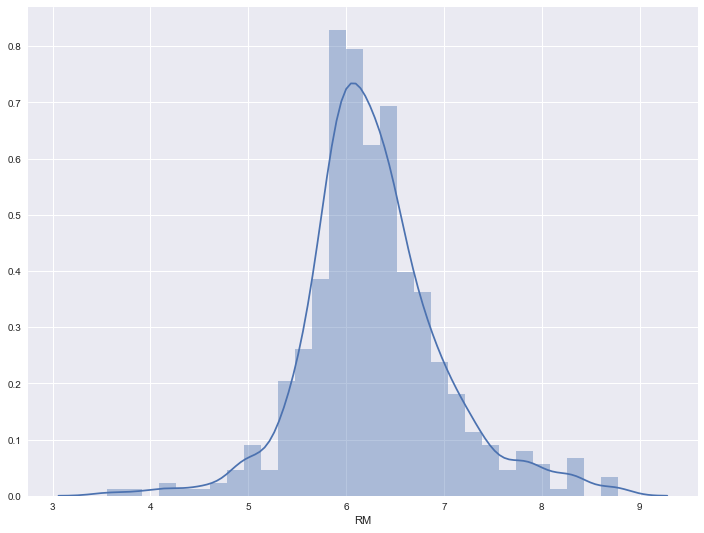

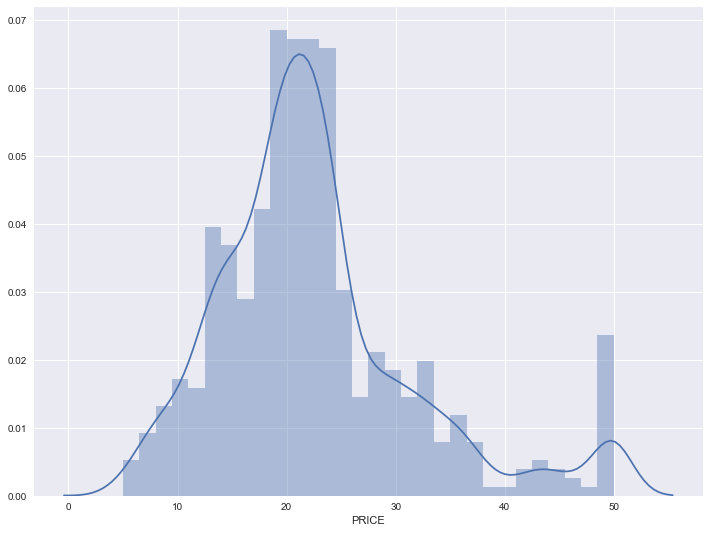

In [9]:
# Data distribution from CRIM and PRICE
seaborn.set(rc={'figure.figsize':(12,9)})
seaborn.distplot(boston['RM'], bins=30)
plot.show()

seaborn.distplot(boston['PRICE'], bins=30)
plot.show()

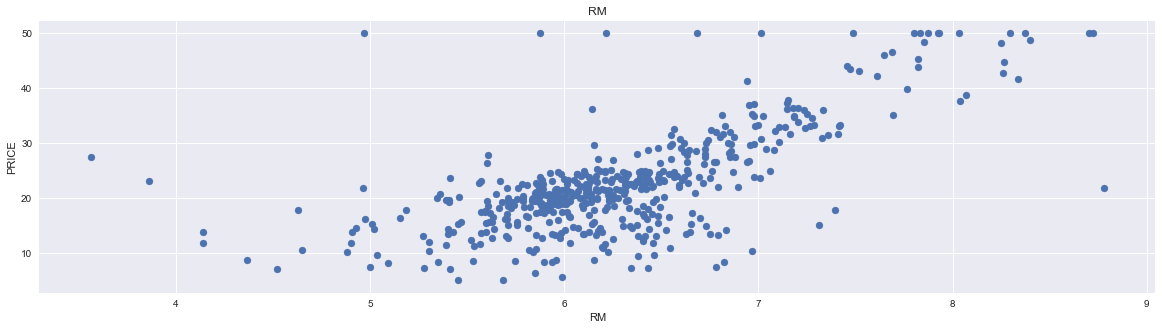

In [11]:
plot.figure(figsize=(20, 5))

features = ['RM']
target = boston['PRICE']

for i, col in enumerate(features):
    plot.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plot.scatter(x, y, marker='o')
    plot.title(col)
    plot.xlabel(col)
    plot.ylabel('PRICE')

In [12]:
# Preparations for training
X = pandas.DataFrame(numpy.c_[boston['RM']], columns = ['RM'])
Y = boston['PRICE']

# Make training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (numpy.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (numpy.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.5068583995673475
R2 score is 0.4696811450822286


The model performance for testing set
--------------------------------------
RMSE is 6.832635897497543
R2 score is 0.5090306525796445


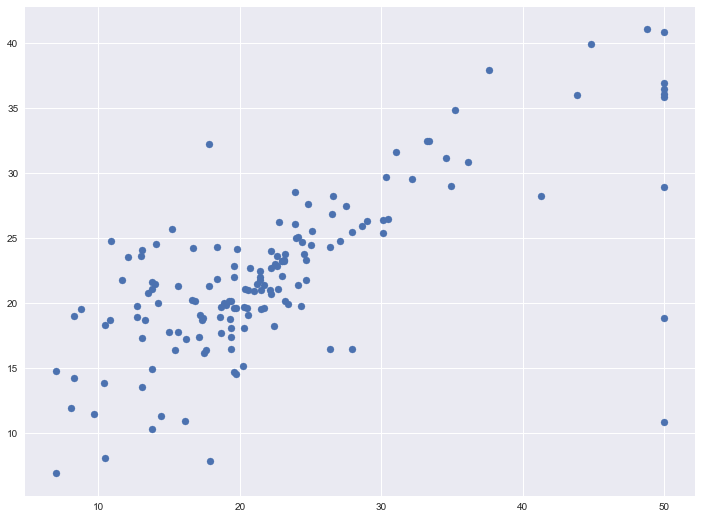

In [13]:
# ideally should be a straight line ??
plot.scatter(Y_test, y_test_predict)
plot.show()